# Import Libraries and Dataset

In [1]:
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
df = pd.read_csv("../input/omdenaliverpoolrtc/accident_data_time_series_imputed.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unnamed: 0,Accident_Index,1st_Road_Number,2nd_Road_Number,Accident_Severity,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Latitude,...,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,2nd_Road_Number.1,1st_Road_Class,2nd_Road_Class,Carriageway_Hazards,Junction_Control,LSOA_of_Accident_Location,Special_Conditions_at_Site
0,0,200501BS00001,3218.0,0.0,Serious,2005-01-04,Tuesday,1.0,Not at junction or within 20 metres,51.489096,...,True,False,True,0.0,A,A,Other object on road,Give way or uncontrolled,E01002849,Roadworks
1,1,200501BS00002,450.0,0.0,Slight,2005-01-05,Wednesday,1.0,Crossroads,51.520075,...,False,False,True,0.0,B,C,Other object on road,Auto traffic signal,E01002909,Roadworks
2,2,200501BS00003,0.0,0.0,Slight,2005-01-06,Thursday,1.0,Not at junction or within 20 metres,51.525301,...,True,False,True,0.0,C,A,Other object on road,Give way or uncontrolled,E01002857,Roadworks
3,3,200501BS00004,3220.0,0.0,Slight,2005-01-07,Friday,1.0,Not at junction or within 20 metres,51.482442,...,True,False,True,0.0,A,A,Other object on road,Give way or uncontrolled,E01002840,Roadworks
4,4,200501BS00005,0.0,0.0,Slight,2005-01-10,Monday,1.0,Not at junction or within 20 metres,51.495752,...,True,False,True,0.0,A,A,Other object on road,Give way or uncontrolled,E01002863,Roadworks


In [4]:
df.isna().sum()

Unnamed: 0                                     0
Accident_Index                                 0
1st_Road_Number                                0
2nd_Road_Number                                0
Accident_Severity                              0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Police_Force        

# Casualties Per Year (per Season)

In [5]:
casualties_per_year = df.groupby("Year")["Number_of_Casualties"].count()
casualties_per_year.head(13)

Year
2005    195916
2006    187082
2007    180005
2008    168527
2009    161672
2010    152596
2011    149365
2012    143783
2013    137192
2014    145490
2015    138920
2016    134828
2017    125990
Name: Number_of_Casualties, dtype: int64

<AxesSubplot:title={'center':'Casualties per Year'}, xlabel='Year', ylabel='Casualties'>

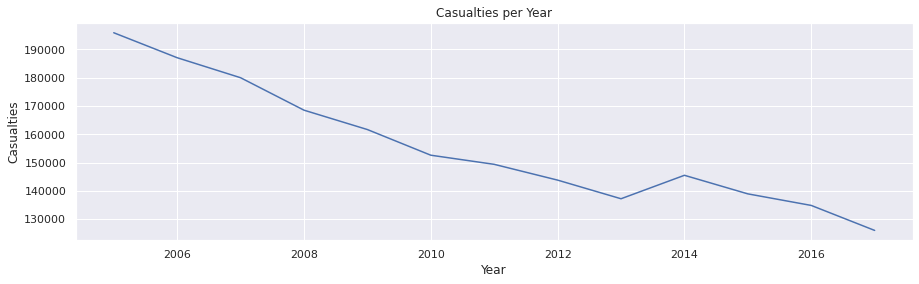

In [6]:
casualties_per_year.plot(kind='line', title='Casualties per Year', ylabel='Casualties', 
                         xlabel='Year', figsize=(15, 4))

In [7]:
df["Date"] =  pd.to_datetime(df["Date"], format="%Y/%m/%d")
df["Day"] = df["Date"].apply(lambda x:x.day)
df["Month"] = df["Date"].apply(lambda x:x.month)

In [8]:
df["Season"] = df["Month"].map({3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer", 7: "Summer", 8: "Summer",
                                9: "Autumn", 10: "Autumn", 11: "Autumn", 12: "Winter", 1: "Winter", 2: "Winter"})

In [9]:
casualties_per_week_year = df.groupby("Season")["Number_of_Casualties"].count()
casualties_per_week_year.head()

Season
Autumn    540246
Spring    488343
Summer    514339
Winter    478438
Name: Number_of_Casualties, dtype: int64

<AxesSubplot:title={'center':'Casualties per Season'}, xlabel='Seasons', ylabel='Casualties'>

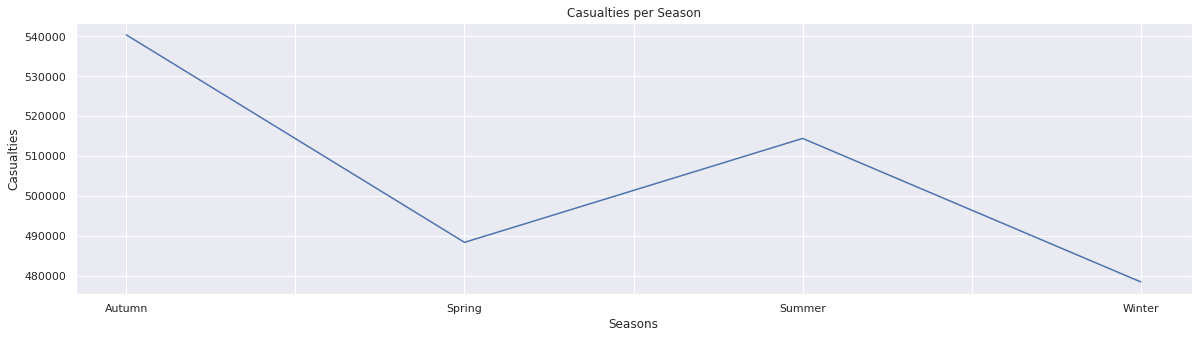

In [10]:
casualties_per_week_year.plot(kind='line', title='Casualties per Season', ylabel='Casualties', 
                         xlabel='Seasons', figsize=(20, 5))

# Casualties per Week

In [11]:
casualties_per_week = df.groupby("Day_of_Week")["Number_of_Casualties"].count()
casualties_per_week.head()

Day_of_Week
Friday      330984
Monday      286765
Saturday    269816
Sunday      222759
Thursday    304217
Name: Number_of_Casualties, dtype: int64

<AxesSubplot:title={'center':'Casualties per Day of Week'}, xlabel='Day of Week', ylabel='Casualties'>

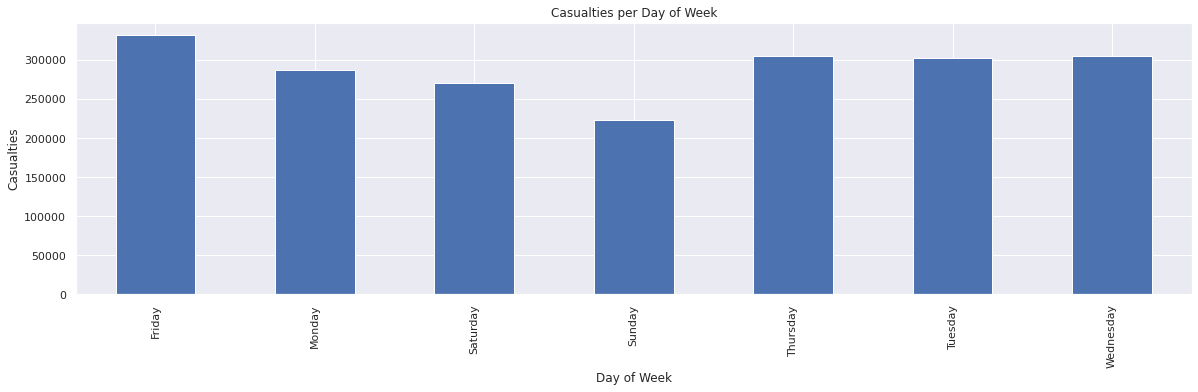

In [12]:
casualties_per_week.plot(kind='bar', title='Casualties per Day of Week', ylabel='Casualties', 
                         xlabel='Day of Week', figsize=(20, 5))

# Casualties per Day of Week per Year

In [13]:
casualties_per_week_year = df.groupby(["Day_of_Week", "Year"])["Number_of_Casualties"].count()
casualties_per_week_year.head(20)

Day_of_Week  Year
Friday       2005    32293
             2006    31642
             2007    28898
             2008    27021
             2009    26379
             2010    25153
             2011    24627
             2012    23239
             2013    22805
             2014    23833
             2015    22182
             2016    22295
             2017    20617
Monday       2005    27418
             2006    25827
             2007    25953
             2008    24082
             2009    22698
             2010    22198
             2011    21083
Name: Number_of_Casualties, dtype: int64

<AxesSubplot:title={'center':'Casualties per Day of Week'}, xlabel='Day of Week per Year', ylabel='Casualties'>

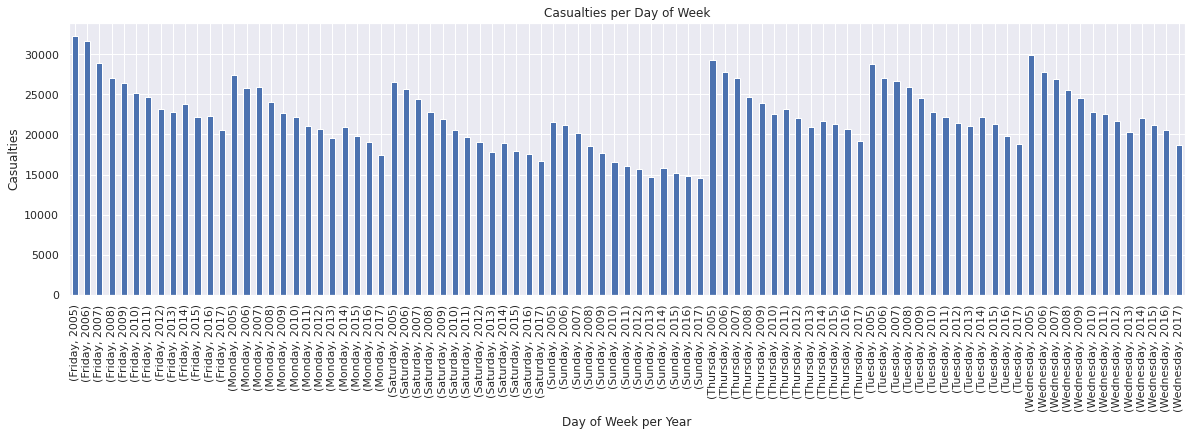

In [14]:
casualties_per_week_year.plot(kind='bar', title='Casualties per Day of Week', ylabel='Casualties', 
                         xlabel='Day of Week per Year', figsize=(20, 5))

# Distribution of Vehicles over the Day

In [15]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M' ).dt.hour
df['Hour'].head()

0    17
1    17
2     0
3    10
4    21
Name: Hour, dtype: int64

In [16]:
vehicles_over_day = df.groupby(["Hour"])["Number_of_Vehicles"].mean()

In [17]:
casualties_over_day = df.groupby(["Hour"])["Number_of_Casualties"].mean()

<AxesSubplot:title={'center':'Distribution of Vehicles over the Day'}, xlabel='Hour of the Day', ylabel='Vehicle Distribution'>

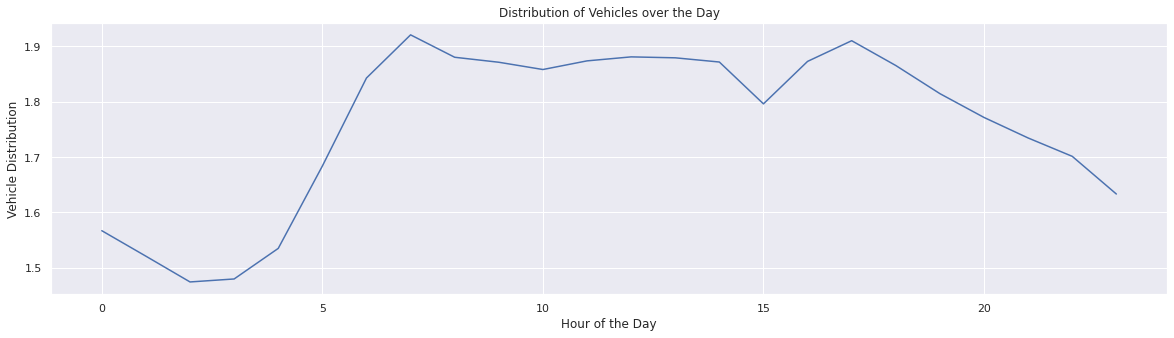

In [18]:
vehicles_over_day.plot(kind='line', title='Distribution of Vehicles over the Day', ylabel='Vehicle Distribution', 
                         xlabel='Hour of the Day', figsize=(20, 5))

<AxesSubplot:title={'center':'Distribution of Casualties over the Day'}, xlabel='Hour of the Day', ylabel='Casualties Distribution'>

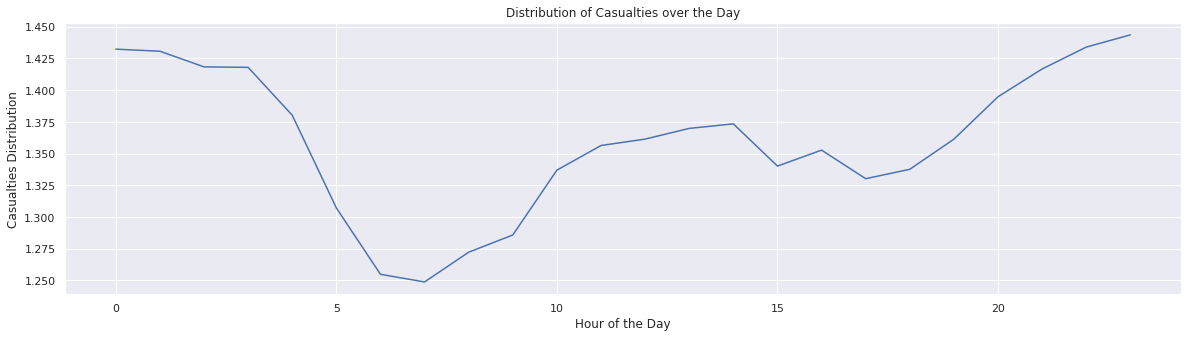

In [19]:
casualties_over_day.plot(kind='line', title='Distribution of Casualties over the Day', ylabel='Casualties Distribution', 
                         xlabel='Hour of the Day', figsize=(20, 5))